In [29]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import  ImageDataGenerator

<b>Read the All Images

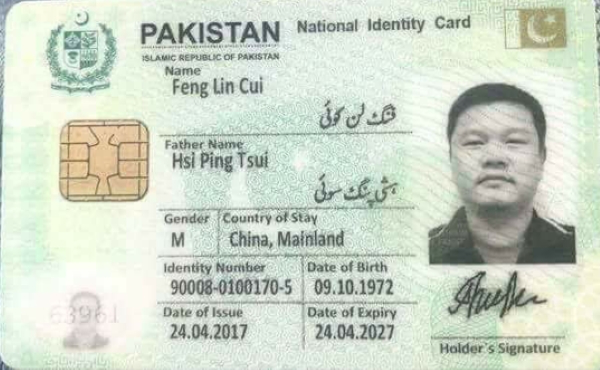

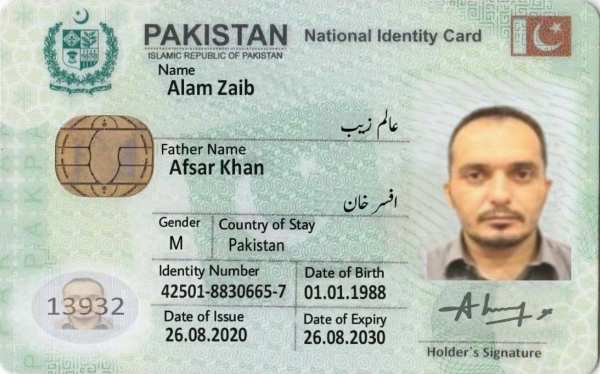

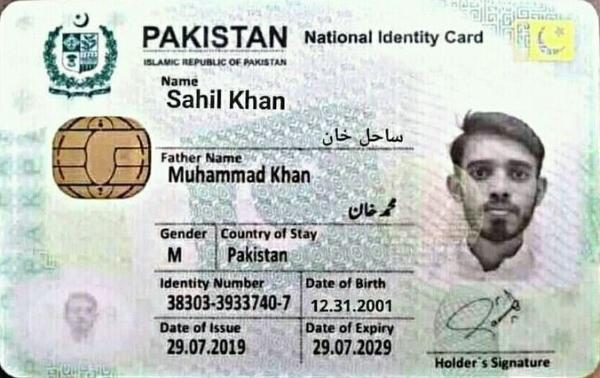

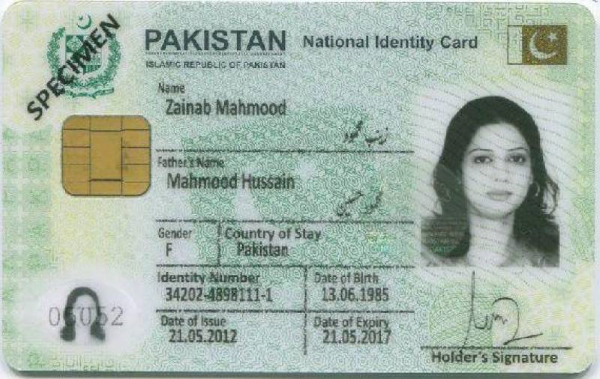

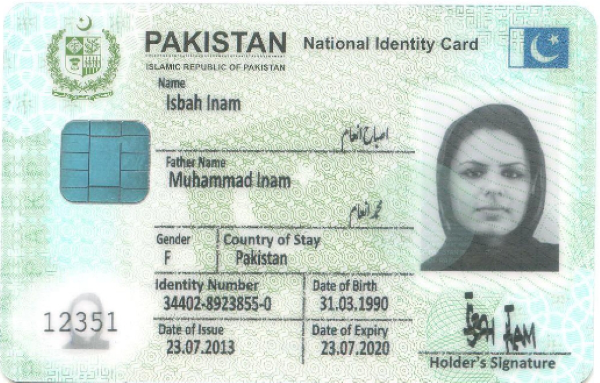

In [12]:
# Read the All Images
img_path = "E:\\software\\Task2\\dataset\\computer vision synthetic dataset\\Id card pic\\cnic_dataset"

for path in os.listdir(img_path):
    image = os.path.join(img_path , path)
    
    # Read the Image
    Images = Image.open(image)
    
    # Display the Image
    display(Images)

<b>Crop the Signature from CNIC Images

In [19]:
index = 1
for path in os.listdir(img_path):
    image = os.path.join(img_path , path)
    
    image = Image.open(image)
        
    # Resize the image
    resized_image = image.resize((600, 370))
    
    # Crop the image
    cropped_image = resized_image.crop((420,280,590,340))
    
    # Save the Image
    cropped_image.save("E:\software\Task2\dataset\computer vision synthetic dataset\Id card pic\Signature\signature{}.jpg".format(index))
    index += 1

<b>Generate the Synthatic Dataset

In [33]:
sig_path = "E:\software\Task2\dataset\computer vision synthetic dataset\Id card pic\Signature"
for image in os.listdir(sig_path):
    # Get the Image Path
    img_path = os.path.join(sig_path , image)
    
    # Read the Image
    Images = Image.open(
        img_path
    )
    
    # Now Convert the Image into Numpy Array
    numpy_image = np.array(Images)
    
    # Reshape the Image
    input_batch = numpy_image.reshape((1,170,60,3))
    
    
    # Create the Object of Image-Data-Generator
    data_gen = ImageDataGenerator(
        rotation_range = 10,
        fill_mode = "constant",
    )

    i = 0
    for output in data_gen.flow(input_batch , batch_size = 64 , save_to_dir = "E:\\software\\Task2\\dataset\\computer vision synthetic dataset\\Id card pic\\signature_dummy_data"):
        i += 1
        if i == 5:
            break